In [59]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import rfpimp
import pickle
from scipy.interpolate import griddata

%matplotlib inline

In [2]:
import warnings
warnings.simplefilter('ignore')

In [3]:
import os
import sys

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [4]:
from importlib import reload
from data_cleaning import data_cleaning as dc
from models import contract_regressor as cr

/Users/colinshanahan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [8]:
model = pickle.load(open('../models/final_model.p', 'rb'))

In [41]:
fa_preds = pd.read_csv('../data/free_agent_preds_2019.csv', index_col='Season_Player')
fa_stats = pd.read_csv('../data/free_agent_cleaned.csv', index_col='Season_Player')
old_contracts = pd.read_csv('../data/clean_stats_final.csv', index_col='Season_Player')

In [42]:
old_contracts.sample(10)

,player_id,first_name,last_name,position,birthdate,season,team_id,team_name,cap_hit,active,...,mean Shots/60,Hits/60,mean Hits/60,PIM/60,mean PIM/60,Penalties Drawn/60,mean Penalties Drawn/60,mean Faceoffs pct,Goalness,mean Goalness
Season_Player,,,,,,,,,,,,,,,,,,,,,
2016 Alex Galchenyuk,4777,Alex,Galchenyuk,Center,1994-02-12,2017,19.0,Coyotes,4900000,1.0,...,7.758442,2.222870,3.133217,1.481913,1.375963,0.432225,0.812316,0.456869,0.377778,0.455782
2017 Devin Shore,4835,Devin,Shore,Center,1994-07-19,2018,25.0,Ducks,2300000,1.0,...,5.827847,3.367234,2.852963,0.663962,0.682760,0.711387,0.731529,0.467474,0.333333,0.363636
2014 Cody Hodgson,17557,Cody,Hodgson,Center,1990-02-18,2015,10.0,Sabres,1050000,NaN,...,7.952540,2.395130,2.030436,0.718539,0.977617,0.778417,0.714413,0.466172,0.428571,0.445652
2016 Adam Clendening,4405,Adam,Clendening,Defense,1992-10-26,2017,30.0,Blue Jackets,650000,NaN,...,4.635153,2.693328,2.364874,2.081208,2.222981,0.612120,0.472975,NaN,0.166667,0.173913
2016 Andrej Sustr,5564,Andrej,Sustr,Defense,1990-11-29,2017,25.0,Ducks,1950000,NaN,...,3.212602,1.918817,1.704338,1.833537,1.613843,0.170562,0.180992,0.000000,0.200000,0.142857
2015 Greg McKegg,3933,Greg,McKegg,Center,1992-06-17,2016,5.0,Hurricanes,700000,1.0,...,6.187560,9.687836,9.668063,0.968784,0.773445,0.484392,0.773445,0.453333,0.666667,0.666667
2015 Colin Miller,4700,Colin,Miller,Defense,1992-10-29,2016,269.0,Golden Knights,1000000,1.0,...,5.336281,4.070045,4.070045,3.527372,3.527372,0.723564,0.723564,NaN,0.176471,0.176471
2015 Riley Sheahan,3892,Riley,Sheahan,Center,1991-12-07,2016,14.0,Panthers,2075000,1.0,...,6.046159,3.501662,2.301441,0.583610,0.663127,0.243171,0.526601,0.482774,0.538462,0.418605
2017 Matt Hendricks,1674,Matt,Hendricks,Center,1981-06-17,2018,28.0,Jets,700000,1.0,...,5.007651,13.051552,11.799277,4.138297,4.694672,0.742771,1.220615,0.532808,0.357143,0.424242


In [44]:
old_contracts['cap_pct']

Season_Player
2014 Francois Beauchemin     6.30
2016 Francois Beauchemin     1.33
2015 Brent Burns            10.96
2017 Zdeno Chara             6.29
2015 Jason Chimera           3.08
2014 Matt Cullen             1.12
2015 Matt Cullen             1.37
2016 Matt Cullen             1.33
2017 Matt Cullen             0.82
2016 Trevor Daley            4.22
2014 Mike Fisher             6.16
2017 Mike Fisher             1.26
2015 Derek MacKenzie         1.88
2017 Brian Gionta            0.88
2016 Patrick Marleau         8.33
2014 Paul Martin             6.79
2014 Mike Green              8.40
2017 Mike Green              6.76
2014 Justin Williams         4.55
2016 Justin Williams         6.00
2016 Ron Hainsey             4.00
2015 Dan Hamhuis             5.14
2017 Dan Hamhuis             1.57
2016 Patrick Sharp           1.07
2016 Scott Hartnell          1.33
2015 Dominic Moore           1.23
2016 Dominic Moore           1.33
2016 Ales Hemsky             1.33
2014 Scottie Upshall         0.98


In [25]:
test = pd.read_csv('../data/test.csv', index_col='Season_Player')

In [26]:
X_test = test.copy()
yp_test = X_test.pop('cap_pct')
yl_test = X_test.pop('length')

In [28]:
sal_imp = rfpimp.importances(model.sal_model, X_test, yp_test)

In [30]:
Xl_test = X_test.copy()
Xl_test['pred_cap_pct'] = model.sal_model.predict(X_test)
len_imp = rfpimp.importances(model.len_model, Xl_test, yl_test)

In [243]:
print('Permutation Importance \nfor cap_pct')
sal_imp.head(10)

Permutation Importance 
for cap_pct


,Importance
Feature,
Total Points,0.070010
TOI,0.056098
3yr TOI/GP,0.031439
TOI/GP,0.021611
iCF,0.020718
mean Total Assists,0.019107
Total Assists,0.017446
On-Ice SH%,0.015961
signing_age,0.014934


In [174]:
print('Permutation Importance \nfor length')
len_imp.head()

Permutation Importance 
for length


,Importance
Feature,
pred_cap_pct,1.351808
signing_age,0.063474
Hits Taken,0.014615
sum iHDCF,0.009704
mean Faceoffs %,0.009163


In [35]:
sal_imp.to_csv('../models/salary_pimp.csv')
len_imp.to_csv('../models/length_pimp.csv')

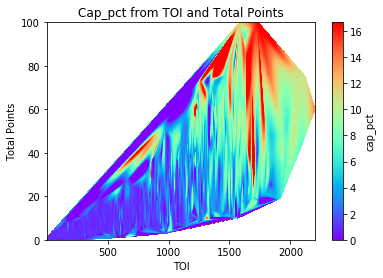

In [241]:
xplot = old_contracts['TOI']
yplot = old_contracts['Total Points']
zplot = old_contracts['cap_pct']

xi = np.linspace(xplot.min(), xplot.max(), 1000)
yi = np.linspace(yplot.min(), yplot.max(), 1000)
zi = griddata((xplot, yplot), zplot, (xi[None,:], yi[:,None]), method='cubic')
z_min, z_max = 0, np.abs(zplot).max()

fig, ax = plt.subplots()

c = ax.pcolormesh(xi, yi, zi, cmap='rainbow', vmin=z_min, vmax=z_max)
ax.set_title('Cap_pct from TOI and Total Points')
# set the limits of the plot to the limits of the data
ax.axis([xi.min(), xi.max(), yi.min(), yi.max()])
fig.colorbar(c, ax=ax, label = 'cap_pct')

plt.xlabel('TOI')
plt.ylabel('Total Points')

plt.savefig('../images/sal_colormesh.png')

plt.show()


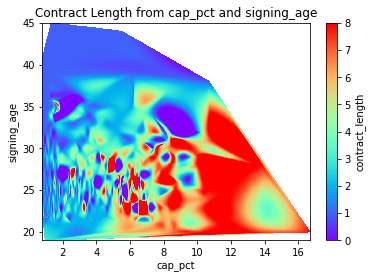

In [242]:
xplot = old_contracts['cap_pct']
yplot = old_contracts['signing_age']
zplot = old_contracts['length']

xi = np.linspace(xplot.min(), xplot.max(), 1000)
yi = np.linspace(yplot.min(), yplot.max(), 1000)
zi = griddata((xplot, yplot), zplot, (xi[None,:], yi[:,None]), method='cubic')
z_min, z_max = 0, np.abs(zplot).max()

fig, ax = plt.subplots()

c = ax.pcolormesh(xi, yi, zi, cmap='rainbow', vmin=z_min, vmax=z_max)
ax.set_title('Contract Length from cap_pct and signing_age')
# set the limits of the plot to the limits of the data
ax.axis([xi.min(), xi.max(), yi.min(), yi.max()])
fig.colorbar(c, ax=ax, label = 'contract_length')

plt.xlabel('cap_pct')
plt.ylabel('signing_age')
#plt.zlabel('cap_pct')

plt.savefig('../images/len_colormesh.png')

plt.show()



In [129]:
toibins = np.linspace(0, old_contracts['TOI'].max(), 20)
old_contracts['TOIbins'] = pd.cut(old_contracts['TOI'], toibins)
tpbins = np.linspace(0, old_contracts['Total Points'].max(), 20)
old_contracts['tpbins'] = pd.cut(old_contracts['Total Points'], tpbins)

In [135]:
capbins = np.linspace(0, old_contracts['cap_pct'].max(), 20)
old_contracts['cap_pct_bins'] = pd.cut(old_contracts['cap_pct'], capbins)
agebins = np.linspace(0, old_contracts['signing_age'].max(), 20)
old_contracts['age_bins'] = pd.cut(old_contracts['signing_age'], agebins)

In [136]:
old_contracts.head()

,player_id,first_name,last_name,position,birthdate,season,team_id,team_name,cap_hit,active,...,mean PIM/60,Penalties Drawn/60,mean Penalties Drawn/60,mean Faceoffs pct,Goalness,mean Goalness,TOIbins,tpbins,cap_pct_bins,age_bins
Season_Player,,,,,,,,,,,,,,,,,,,,,
2014 Francois Beauchemin,257,Francois,Beauchemin,Defense,1980-06-04,2015,NaN,NaN,4500000,1.0,...,1.529215,0.206143,0.271543,1.000000,0.458333,0.323077,"(1389.8, 1505.617]","(21.053, 26.316]","(6.142, 7.019]","(33.158, 35.526]"
2016 Francois Beauchemin,257,Francois,Beauchemin,Defense,1980-06-04,2017,NaN,NaN,1000000,1.0,...,1.347387,0.240996,0.228371,1.000000,0.263158,0.315789,"(1737.25, 1853.067]","(15.789, 21.053]","(0.877, 1.755]","(35.526, 37.895]"
2015 Brent Burns,355,Brent,Burns,Defense,1985-03-09,2017,21.0,Sharks,8000000,1.0,...,1.738683,0.480939,0.571935,0.469697,0.355263,0.358696,"(2084.7, 2200.517]","(73.684, 78.947]","(10.528, 11.406]","(30.789, 33.158]"
2017 Zdeno Chara,371,Zdeno,Chara,Defense,1977-03-18,2018,3.0,Bruins,5000000,1.0,...,2.130981,0.502407,0.616863,0.000000,0.280000,0.285714,"(1621.433, 1737.25]","(21.053, 26.316]","(6.142, 7.019]","(40.263, 42.632]"
2015 Jason Chimera,375,Jason,Chimera,Left Wing,1979-05-02,2016,NaN,NaN,2250000,1.0,...,1.916418,0.624919,0.843927,0.465969,0.487805,0.411765,"(1042.35, 1158.167]","(36.842, 42.105]","(2.632, 3.509]","(35.526, 37.895]"


In [131]:
cap_pct_htmap = old_contracts[['TOIbins', 'tpbins', 'cap_pct']]
cap_pct_htmap.to_csv('../data/cap_pct_htmap.csv')

In [139]:
length_htmap = old_contracts[['cap_pct_bins', 'age_bins', 'length']]
length_htmap.to_csv('../data/len_htmap.csv')

In [ ]:
xplot = old_contracts['TOI']
yplot = old_contracts['Total Points']
zplot = old_contracts['cap_pct']

xi = np.linspace(xplot.min(), xplot.max(), 1000)
yi = np.linspace(yplot.min(), yplot.max(), 1000)
zi = griddata((xplot, yplot), zplot, (xi[None,:], yi[:,None]), method='cubic')
z_min, z_max = 0, np.abs(zplot).max()

fig, ax = plt.subplots()

c = ax.pcolormesh(xi, yi, zi, cmap='rainbow', vmin=z_min, vmax=z_max)
ax.set_title('Cap_pct from TOI and Total Points')
# set the limits of the plot to the limits of the data
ax.axis([xi.min(), xi.max(), yi.min(), yi.max()])
fig.colorbar(c, ax=ax, label = 'cap_pct')

plt.xlabel('TOI')
plt.ylabel('Total Points')


plt.show()

In [146]:
old_contracts['cap_pct'].mean(), old_contracts['cap_hit'].mean(), old_contracts['length'].mean()

(2.6233081444164545, 1968965.2502099075, 2.2384550797649037)

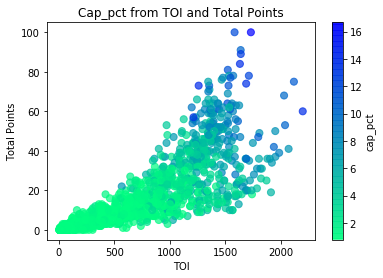

In [180]:
xplot = old_contracts['TOI']
yplot = old_contracts['Total Points']
zplot = old_contracts['cap_pct']

cmap = sns.cubehelix_palette(as_cmap=True)

fig, ax = plt.subplots()

points = ax.scatter(xplot, yplot, c=zplot, s=50, cmap='winter_r', alpha = 0.7)
fig.colorbar(points, label='cap_pct')
#c = ax.pcolormesh(xi, yi, zi, cmap='rainbow', vmin=z_min, vmax=z_max)
ax.set_title('Cap_pct from TOI and Total Points')
# set the limits of the plot to the limits of the data
#ax.axis([xi.min(), xi.max(), yi.min(), yi.max()])
#fig.colorbar(c, ax=ax, label = 'cap_pct')

plt.xlabel('TOI')
plt.ylabel('Total Points')
plt.savefig('../images/cap_pct_scatter.png')
plt.show()


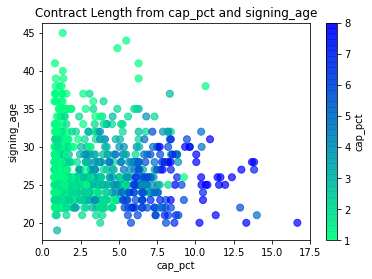

In [179]:
xplot = old_contracts['cap_pct']
yplot = old_contracts['signing_age']
zplot = old_contracts['length']

#cmap = sns.cubehelix_palette(as_cmap=True)

fig, ax = plt.subplots()

points = ax.scatter(xplot, yplot, c=zplot, s=50, cmap='winter_r', alpha = 0.7)
fig.colorbar(points, label='cap_pct')
#c = ax.pcolormesh(xi, yi, zi, cmap='rainbow', vmin=z_min, vmax=z_max)
ax.set_title('Contract Length from cap_pct and signing_age')
# set the limits of the plot to the limits of the data
#ax.axis([xi.min(), xi.max(), yi.min(), yi.max()])
#fig.colorbar(c, ax=ax, label = 'cap_pct')

plt.xlabel('cap_pct')
plt.ylabel('signing_age')
plt.savefig('../images/length_scatter.png')
plt.show()


In [172]:
old_contracts['total_value'].mean()

7256329.3526448365

In [206]:
mean_per_len = old_contracts.groupby('length')['cap_pct'].mean()

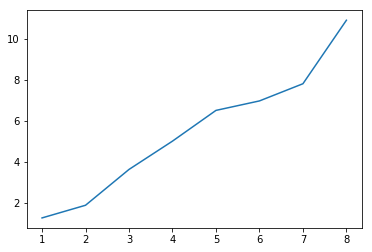

In [207]:
plt.plot(mean_per_len)

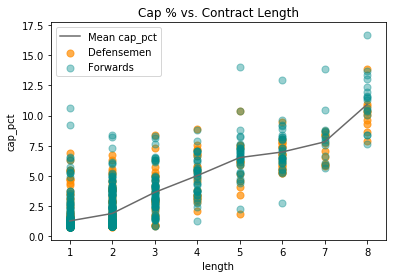

In [208]:
xplot_f = old_contracts[old_contracts.forward == 1]['length']
yplot_f = old_contracts[old_contracts.forward == 1]['cap_pct']
zplot_f = old_contracts[old_contracts.forward == 1]['forward']

xplot_d = old_contracts[old_contracts.forward == 0]['length']
yplot_d = old_contracts[old_contracts.forward == 0]['cap_pct']
zplot_d = old_contracts[old_contracts.forward == 0]['forward']

old_contracts.groupby('length')['cap_pct'].mean()

#cmap = sns.cubehelix_palette(as_cmap=True)

fig, ax = plt.subplots()

points = ax.scatter(xplot_d, yplot_d, c='#FF8C00', s=50, alpha = 0.7, label = 'Defensemen')
points = ax.scatter(xplot_f, yplot_f, c='#008B8B', s=50, alpha = 0.4, label = 'Forwards')

ax.plot(mean_per_len, c='#696969', label = 'Mean cap_pct')

#fig.colorbar(points, label='position')
plt.legend()
ax.set_title('Cap % vs. Contract Length')
# set the limits of the plot to the limits of the data
#ax.axis([xi.min(), xi.max(), yi.min(), yi.max()])
#fig.colorbar(c, ax=ax, label = 'cap_pct')

plt.xlabel('length')
plt.ylabel('cap_pct')
plt.savefig('../images/cap_length_scatter.png')
plt.show()

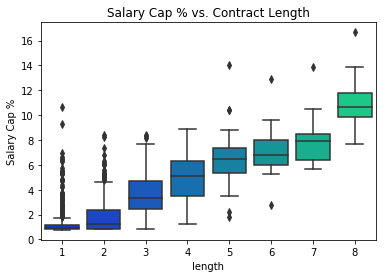

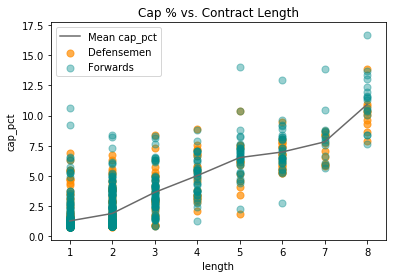

In [217]:
xplot = old_contracts['length']
yplot = old_contracts['cap_pct']
zplot = old_contracts['forward']

xplot_f = old_contracts[old_contracts.forward == 1]['length']
yplot_f = old_contracts[old_contracts.forward == 1]['cap_pct']
zplot_f = old_contracts[old_contracts.forward == 1]['forward']

# xplot_d = old_contracts[old_contracts.forward == 0]['length']
# yplot_d = old_contracts[old_contracts.forward == 0]['cap_pct']
# zplot_d = old_contracts[old_contracts.forward == 0]['forward']

sns.boxplot(xplot, yplot, palette='winter')
plt.title('Salary Cap % vs. Contract Length')
plt.savefig('../images/cap_length_box.png')
plt.xlabel('length')
plt.ylabel('Salary Cap %')



#cmap = sns.cubehelix_palette(as_cmap=True)

fig, ax = plt.subplots()

points = ax.scatter(xplot_d, yplot_d, c='#FF8C00', s=50, alpha = 0.7, label = 'Defensemen')
points = ax.scatter(xplot_f, yplot_f, c='#008B8B', s=50, alpha = 0.4, label = 'Forwards')

ax.plot(mean_per_len, c='#696969', label = 'Mean cap_pct')

#fig.colorbar(points, label='position')
plt.legend()
ax.set_title('Cap % vs. Contract Length')
# set the limits of the plot to the limits of the data
#ax.axis([xi.min(), xi.max(), yi.min(), yi.max()])
#fig.colorbar(c, ax=ax, label = 'cap_pct')

plt.xlabel('length')
plt.ylabel('cap_pct')
#plt.savefig('../images/cap_length_scatter.png')
plt.show()

In [218]:
old_contracts.shape

(1191, 228)

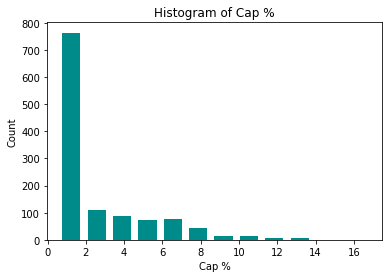

In [237]:
plt.hist(old_contracts['cap_pct'], bins = 12, color = '#008B8B', width = 0.95)
plt.title('Histogram of Cap %')
plt.xlabel('Cap %')
plt.ylabel('Count')
plt.savefig('../images/sal_hist.png')
plt.show()

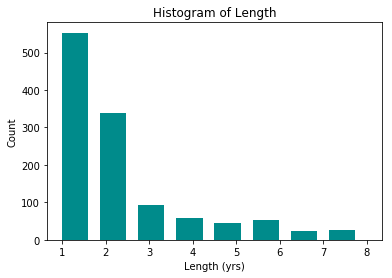

In [239]:
plt.hist(old_contracts['length'], bins = 8, color = '#008B8B', width = 0.6)
plt.title('Histogram of Length')
plt.xlabel('Length (yrs)')
plt.ylabel('Count')
plt.savefig('../images/len_hist.png')
plt.show()